In [1]:
!nvidia-smi

Sat Oct 21 01:50:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# We are learning Deep learning.


In [2]:
a = 100

In [3]:
pip freeze

absl-py==1.4.0
aiohttp==3.8.6
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.3.1
altair==4.2.2
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.4.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.0
attrs==23.1.0
audioread==3.0.1
autograd==1.6.2
Babel==2.13.0
backcall==0.2.0
beautifulsoup4==4.11.2
bidict==0.22.1
bigframes==0.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.2.2
bqplot==0.12.42
branca==0.6.0
build==1.0.3
CacheControl==0.13.1
cachetools==5.3.1
catalogue==2.0.10
certifi==2023.7.22
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.0
chex==0.1.7
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpickle==2.2.1
cmake==3.27.7
cmdstanpy==1.2.0
colorcet==3.0.1
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.3
cons==0.4.6
contextlib2==21.6.0
contourpy==1.1.1
cryptography==41.0.4
cufflinks==0.17.3
cupy-cuda11x==11.0.0
cvxopt==1.3.2
cvxpy==1.3.2
cycler==0.12.1
cym

In [4]:
pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.9 MB/s eta 0:00:00


In [5]:
# Importing the required libraries

import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner.tuners import RandomSearch

Using TensorFlow backend


In [6]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.drop(columns = ['RowNumber','CustomerId','Surname'], axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
# one hot encoding the gender and geography columns

geo_ohe = pd.get_dummies(df.Geography, prefix = 'Geography')
gen_ohe = pd.get_dummies(df.Gender, prefix = 'Gender')

display(geo_ohe)
display(gen_ohe)

,Geography_France,Geography_Germany,Geography_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


,Gender_Female,Gender_Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [13]:
data = pd.concat([df, geo_ohe, gen_ohe], axis = 1).drop(['Gender','Geography'], axis = 1)
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [14]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700,0.454300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698,0.497932,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
a = 7963+2037

In [17]:
b = 2037/10000*100


In [18]:
# Splitting the data
X = data.drop('Exited', axis = 1)
Y = data['Exited']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 16, stratify = Y)

In [19]:
x_train.shape, x_test.shape

((8000, 13), (2000, 13))

In [20]:
# Data Normalization
normalizer = MinMaxScaler()

x_train_scaled = pd.DataFrame(normalizer.fit_transform(x_train), columns = x_train.columns)
x_test_scaled = pd.DataFrame(normalizer.transform(x_test), columns = x_test.columns)

display(x_train_scaled)
display(x_test_scaled)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.608,0.148649,0.4,0.386511,0.000000,0.0,1.0,0.707030,1.0,0.0,0.0,1.0,0.0
1,0.388,0.270270,0.8,0.000000,0.000000,1.0,1.0,0.491032,1.0,0.0,0.0,0.0,1.0
2,0.494,0.108108,0.5,0.000000,0.333333,0.0,1.0,0.475783,0.0,0.0,1.0,0.0,1.0
3,0.422,0.135135,0.7,0.000000,0.333333,1.0,0.0,0.038931,1.0,0.0,0.0,0.0,1.0
4,0.400,0.243243,0.2,0.453878,0.333333,1.0,0.0,0.874635,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.462,0.256757,1.0,0.415527,0.000000,1.0,0.0,0.433030,1.0,0.0,0.0,1.0,0.0
7996,0.672,0.351351,0.7,0.219426,0.000000,1.0,0.0,0.908815,1.0,0.0,0.0,1.0,0.0
7997,0.454,0.310811,0.6,0.000000,0.000000,1.0,1.0,0.838128,1.0,0.0,0.0,0.0,1.0
7998,0.604,0.108108,0.3,0.550017,0.333333,0.0,1.0,0.844972,1.0,0.0,0.0,0.0,1.0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.562,0.054054,0.6,0.554528,0.000000,1.0,1.0,0.318710,0.0,1.0,0.0,1.0,0.0
1,0.666,0.729730,0.3,0.561970,0.000000,0.0,1.0,0.264349,1.0,0.0,0.0,0.0,1.0
2,0.634,0.216216,0.5,0.000000,0.333333,1.0,0.0,0.819174,0.0,0.0,1.0,1.0,0.0
3,0.710,0.202703,0.7,0.272716,0.000000,1.0,1.0,0.324336,0.0,0.0,1.0,0.0,1.0
4,0.260,0.094595,0.3,0.694825,0.333333,0.0,0.0,0.908264,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.620,0.216216,0.8,0.424422,0.333333,0.0,1.0,0.911342,1.0,0.0,0.0,0.0,1.0
1996,0.794,0.121622,1.0,0.000000,0.333333,0.0,0.0,0.064988,1.0,0.0,0.0,0.0,1.0
1997,0.362,0.175676,0.3,0.000000,0.000000,1.0,1.0,0.212909,1.0,0.0,0.0,0.0,1.0
1998,0.224,0.081081,0.9,0.278524,0.333333,0.0,1.0,0.322078,0.0,1.0,0.0,1.0,0.0


In [21]:
x_train_scaled.shape

(8000, 13)

In [25]:
# fit() - storing the stastical values
# fit_transform() - storing the statstical values and apply that values(formula) on the data
# transform() - we just apply the stored values ( formula) on the data

# Steps need to follow for building the ANN

### Sequential stacking
#### [input layer, hidden layer, out put layer]

#### Each layer has an activation function common for all the neuron

#### Each layer would have an distinct kernel_initializer( weight initializer)

#### Each network would have to be compiled using a particular optimization function

#### Each network would have to be compiled using a particular loss function

In [23]:
#---------------------------Generating the basic structure of ANN-------------------

# creating the instance of model
model = tf.keras.Sequential()

# Adding the input layer
model.add(tf.keras.layers.Input(shape = (13,)))

# Adding the hidden layer I
model.add(tf.keras.layers.Dense(units = 8,
                                activation = 'relu',
                                kernel_initializer = 'he_normal'))

# Adding the hidden layer II
model.add(tf.keras.layers.Dense(units = 12,
                                activation = 'relu',
                                kernel_initializer = 'he_uniform'))

# Adding the hidden layer III
model.add(tf.keras.layers.Dense(units = 6,
                                activation = 'relu',
                                kernel_initializer = 'he_normal'))

# Adding the out put layer
model.add(tf.keras.layers.Dense(units = 1,
                                activation = 'sigmoid',
                                kernel_initializer = 'glorot_normal'))

# ------------------------ compiling the model-----------------------
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy','Precision','Recall'])



In [24]:
# Summarizing the structure

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 6)                 78        
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 305 (1.19 KB)
Trainable params: 305 (1.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Training the model

history_obj = model.fit(x = x_train_scaled,
                        y = y_train,
                        batch_size = 100,
                        epochs = 100,
                        validation_data = (x_test_scaled, y_test),
                        validation_batch_size= 100,
                        use_multiprocessing= True,
                        workers = 10)

Epoch 1/100
80/80 [==============================] - 7s 7ms/step - loss: 0.6313 - accuracy: 0.6270 - precision: 0.2428 - recall: 0.3920 - val_loss: 0.5205 - val_accuracy: 0.7970 - val_precision: 1.0000 - val_recall: 0.0025
Epoch 2/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4894 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4835 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
80/80 [==============================] - 0s 4ms/step - loss: 0.4771 - accuracy: 0.7962 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4788 - val_accuracy: 0.7965 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
80/80 [==============================] - 0s 4ms/

In [34]:
# Fetching the required data from history object

def visualizer(hist_obj_1, parameter):
  plt.figure(figsize=(24,10))
  train_param = hist_obj_1.history.get(parameter)
  val_param =  hist_obj_1.history.get(f'val_{parameter}')
  epochs = hist_obj_1.epoch

  sns.lineplot(x = epochs, y =  train_param)
  sns.lineplot(x = epochs, y =  val_param)

  plt.legend(labels = [parameter, f'val_{parameter}'])
  plt.xticks(ticks = epochs, labels = epochs, rotation = 90)
  plt.yticks(ticks = [i/100 for i in range(10, 110, 10)], labels= [i/100 for i in range(10, 110, 10)])
  plt.show()

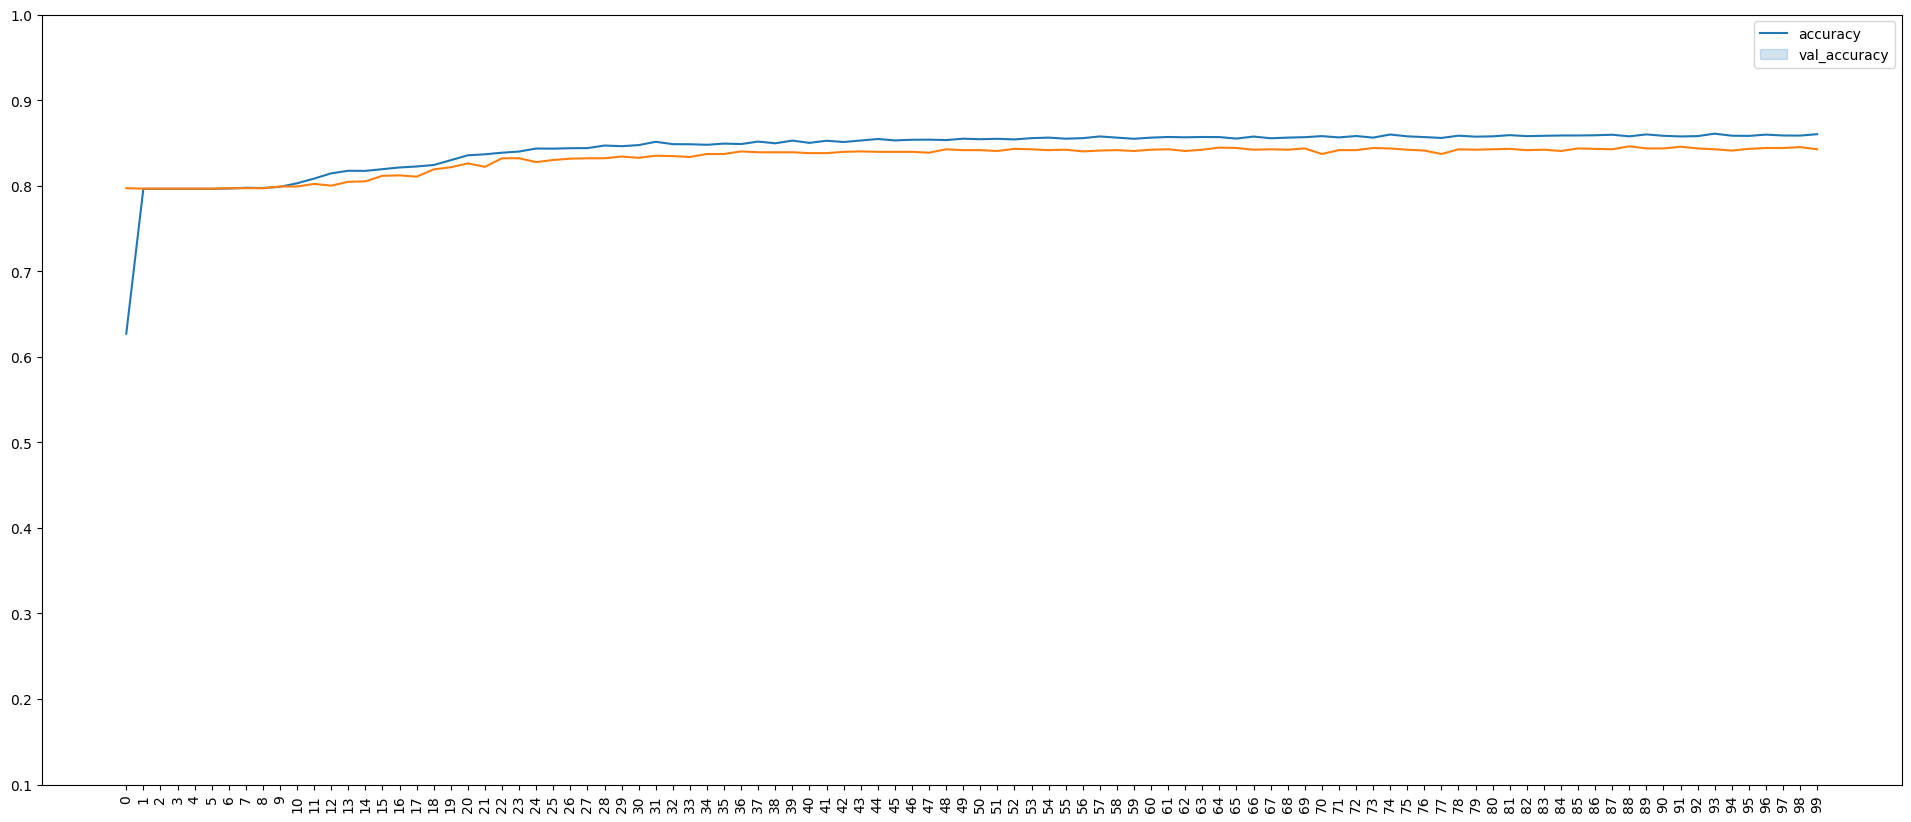

In [35]:
visualizer(history_obj, 'accuracy')

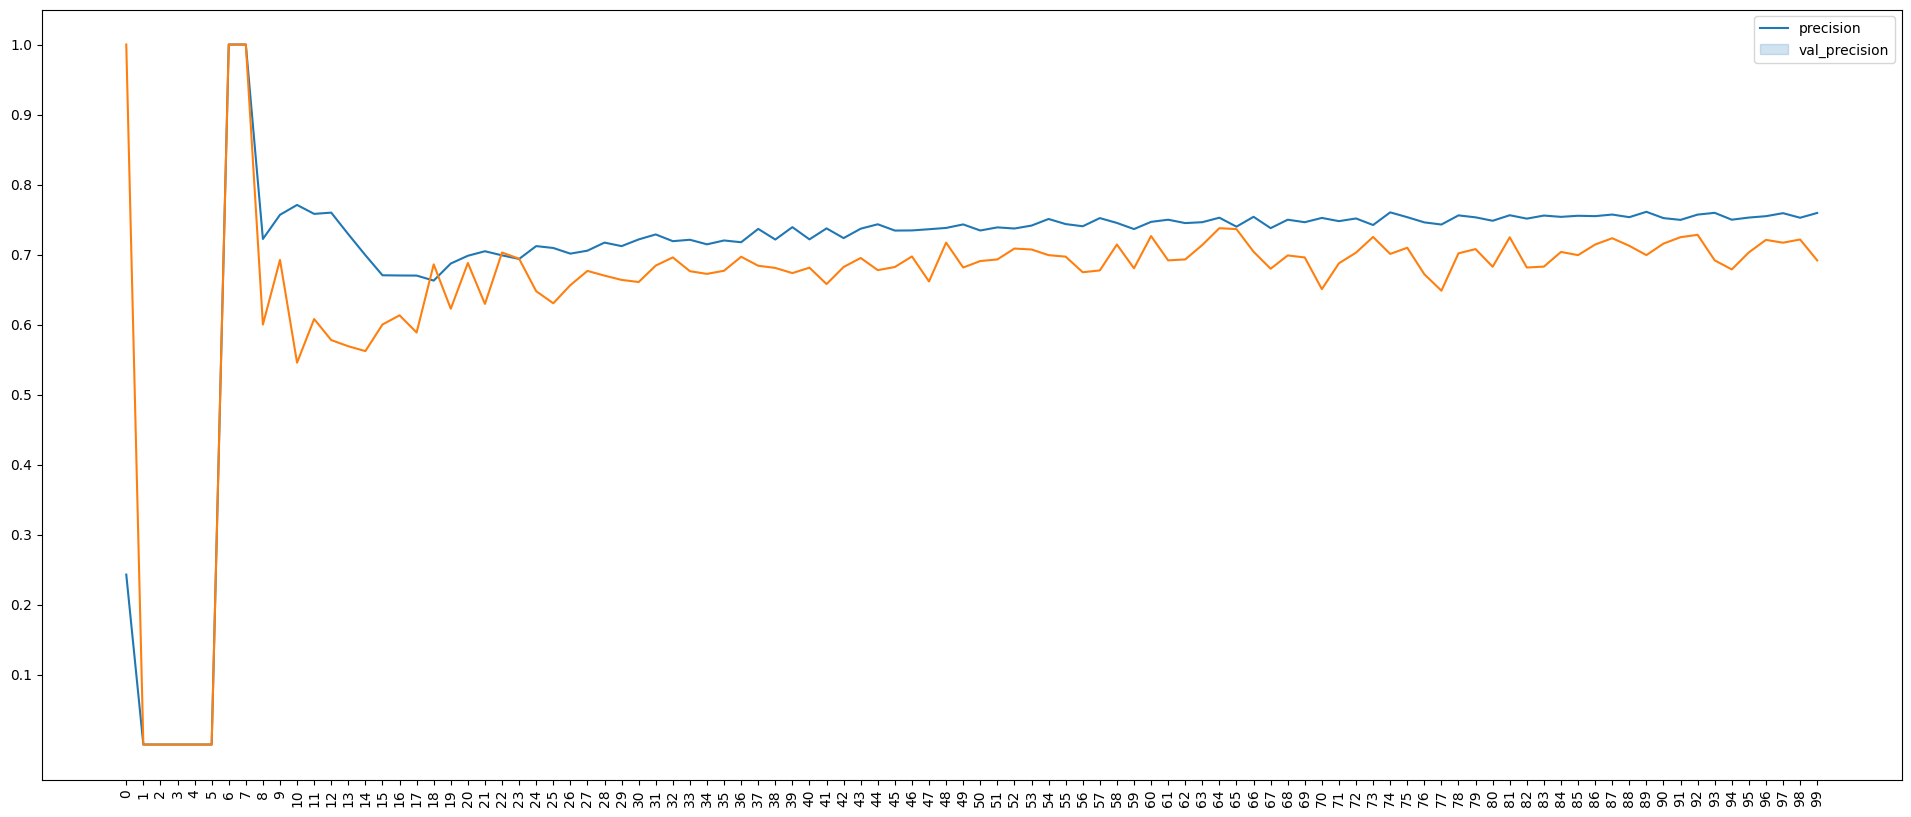

In [36]:
visualizer(history_obj, 'precision')

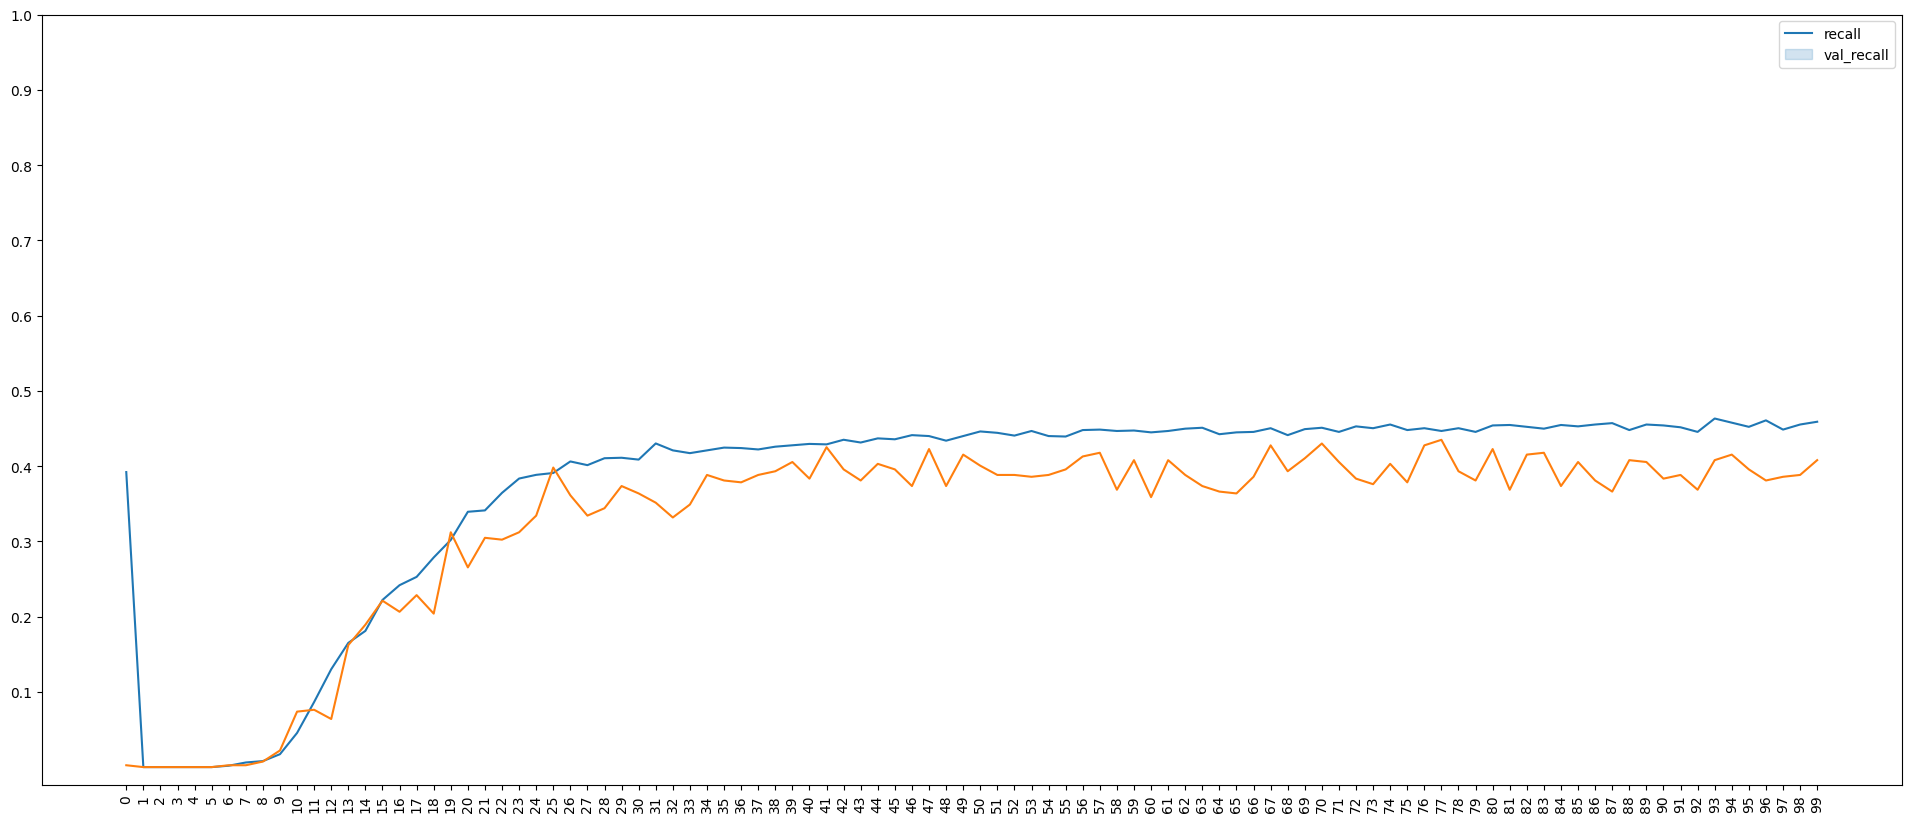

In [37]:
visualizer(history_obj, 'recall')

# Early Stopping

In [39]:
early_stopper = EarlyStopping(monitor = 'accuracy', patience = 10)

In [42]:
# Training the model

history_obj_2 = model.fit(x = x_train_scaled,
                        y = y_train,
                        batch_size = 100,
                        epochs = 100,
                        validation_data = (x_test_scaled, y_test),
                        validation_batch_size= 100,
                        use_multiprocessing= True,
                        workers = 10,
                        callbacks = [early_stopper])

Epoch 1/100
80/80 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.8609 - precision: 0.7593 - recall: 0.4644 - val_loss: 0.3662 - val_accuracy: 0.8445 - val_precision: 0.6951 - val_recall: 0.4201
Epoch 2/100
80/80 [==============================] - 0s 5ms/step - loss: 0.3346 - accuracy: 0.8601 - precision: 0.7610 - recall: 0.4571 - val_loss: 0.3689 - val_accuracy: 0.8395 - val_precision: 0.6654 - val_recall: 0.4251
Epoch 3/100
80/80 [==============================] - 0s 4ms/step - loss: 0.3345 - accuracy: 0.8606 - precision: 0.7552 - recall: 0.4675 - val_loss: 0.3718 - val_accuracy: 0.8455 - val_precision: 0.7606 - val_recall: 0.3514
Epoch 4/100
80/80 [==============================] - 1s 7ms/step - loss: 0.3346 - accuracy: 0.8601 - precision: 0.7583 - recall: 0.4601 - val_loss: 0.3678 - val_accuracy: 0.8455 - val_precision: 0.7269 - val_recall: 0.3857
Epoch 5/100
80/80 [==============================] - 0s 5ms/step - loss: 0.3333 - accuracy: 0.8620 - precisi

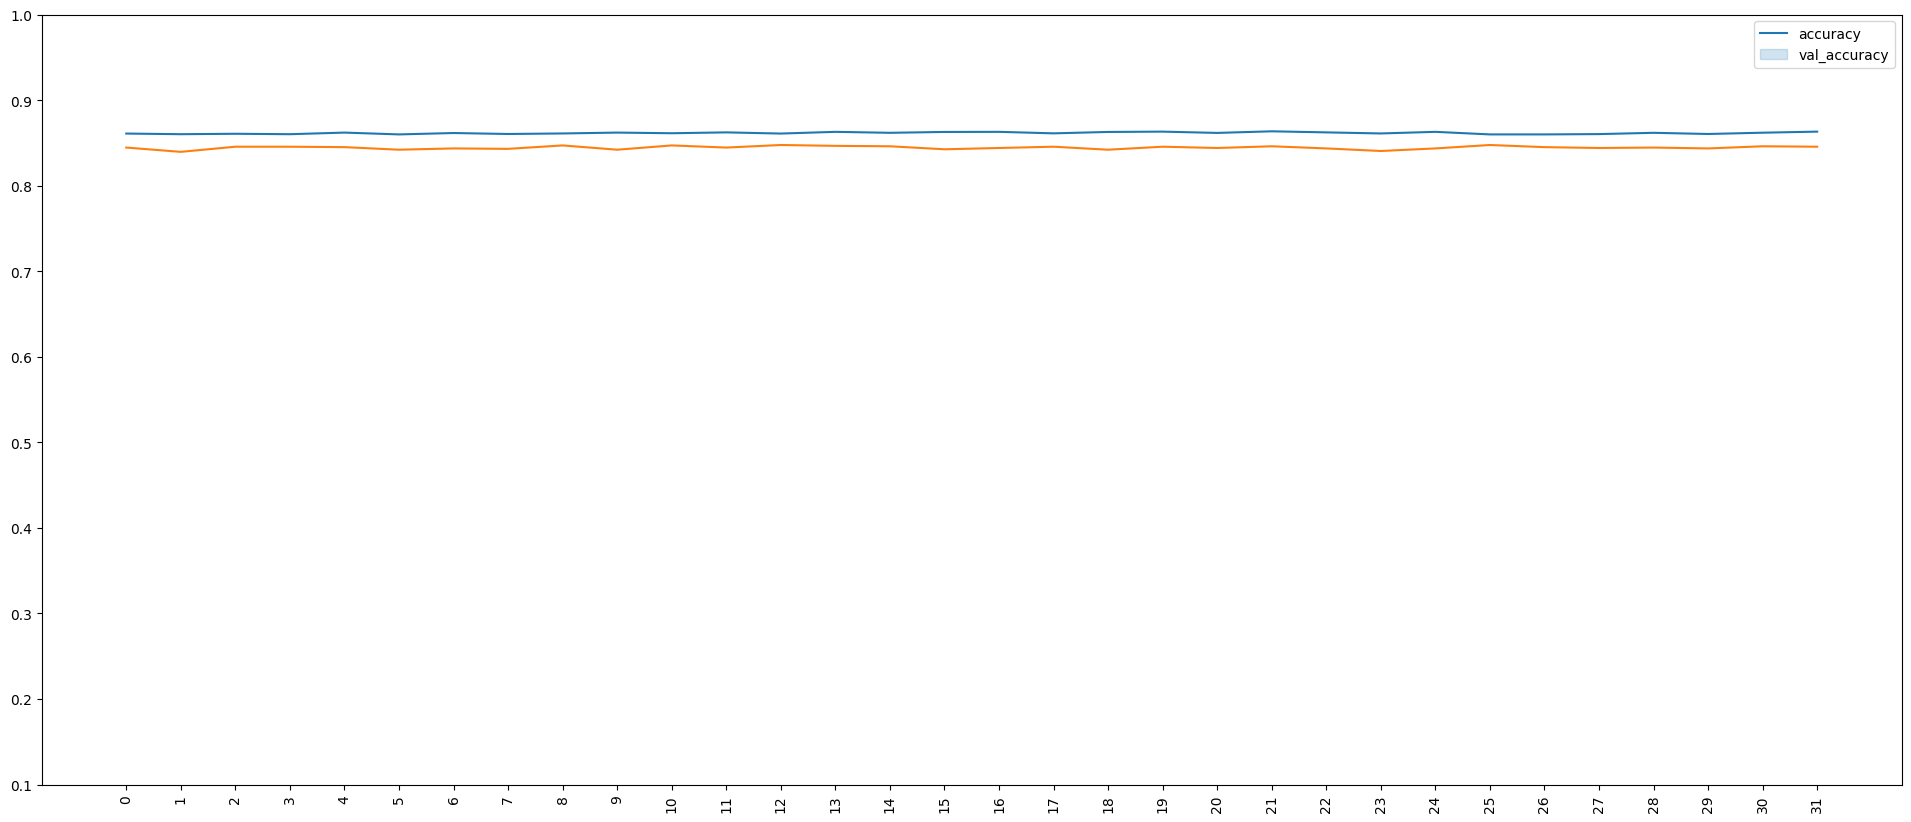

In [43]:
visualizer(history_obj_2, 'accuracy')

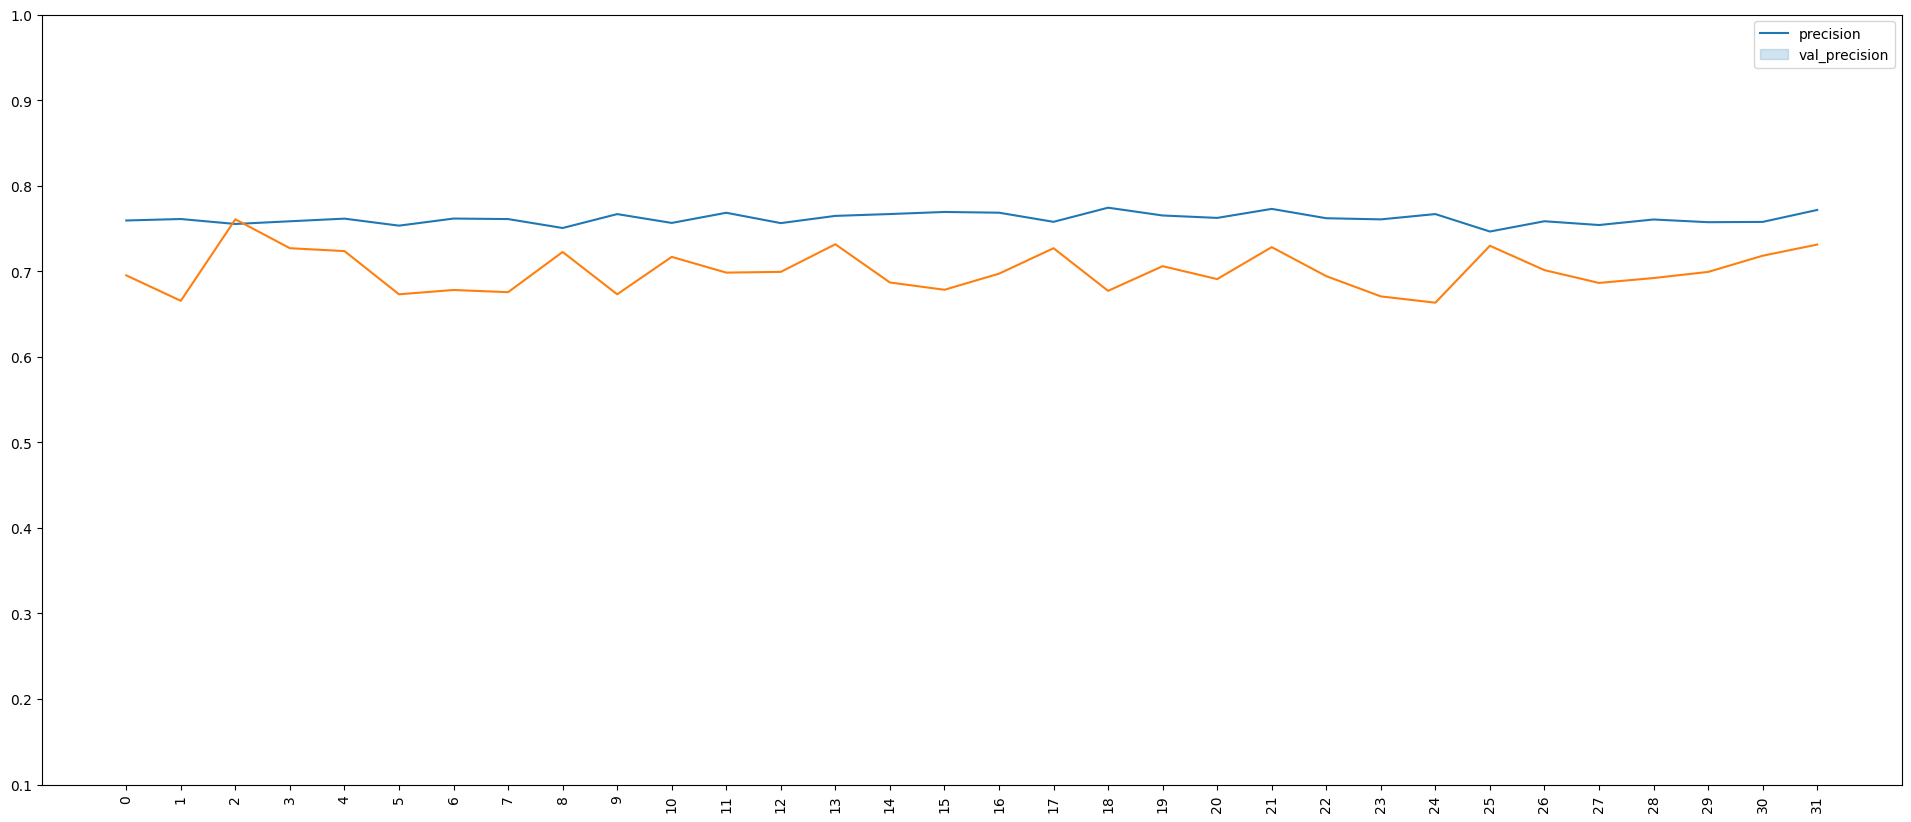

In [44]:
visualizer(history_obj_2, 'precision')

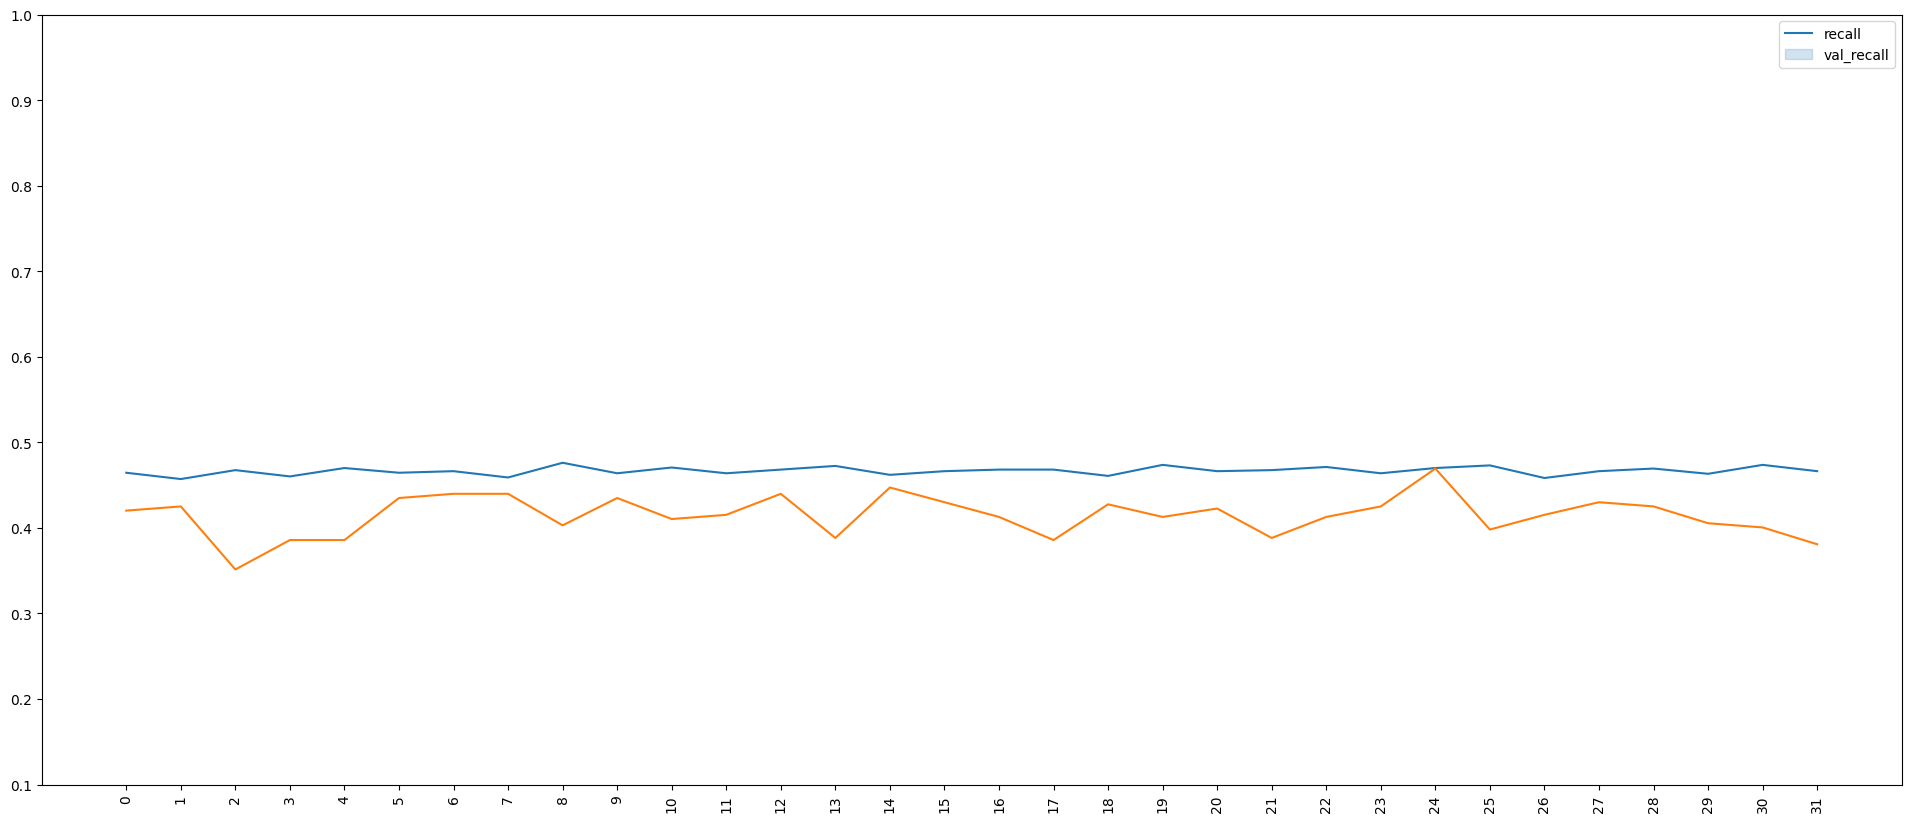

In [45]:
visualizer(history_obj_2, 'recall')

# HyperParameter Tuning

In [ ]:
# hyp.Choice(list_of_element)
# hyp.Int(range_of_element)

In [47]:
def hypermodel(hyp):
  # initializing the model
  model = tf.keras.Sequential()

  # adding the input layers
  model.add(tf.keras.layers.Input(shape = (13,)))


  # adding the hidden layers
  for layer_num in range(hyp.Int('number of hidden layers', min_value = 1, max_value = 18)):
    model.add(tf.keras.layers.Dense(units = hyp.Int(f'numberb of neurons in layer {layer_num}',min_value = 4, max_value = 20, step = 4),
                                    activation = hyp.Choice(f'activation function for layer {layer_num}',['sigmoid','relu']),
                                    kernel_initializer= hyp.Choice(f'kerenel initializer for layer {layer_num}',['he_normal','he_uniform','glorot_normal','glorot_uniform'])))

  # adding the out put layer
  model.add(tf.keras.layers.Dense(units = 1,
                                  activation = 'sigmoid',
                                  kernel_initializer = hyp.Choice('kernel initializer use in out put layer',['he_normal','he_uniform','glorot_normal','glorot_uniform'])))

  # Compiling the model
  model.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision','Recall'])

  return model



In [48]:
# Generating the tuner object
tuner = RandomSearch(hypermodel = hypermodel,
                     objective = 'accuracy')

In [49]:
# Summarizing the tuner object

tuner.search_space_summary()


Search space summary
Default search space size: 5
number of hidden layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 18, 'step': 1, 'sampling': 'linear'}
numberb of neurons in layer 0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 4, 'sampling': 'linear'}
activation function for layer 0 (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
kerenel initializer for layer 0 (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
kernel initializer use in out put layer (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}


In [50]:
# Tuning the model
tuner.search(x_train_scaled, y_train, epochs = 50, batch_size = 100)

Trial 10 Complete [00h 00m 43s]
accuracy: 0.7962499856948853

Best accuracy So Far: 0.8588749766349792
Total elapsed time: 00h 06m 01s


In [52]:
# Fetching the best model from tuned objects
best_model = tuner.get_best_models()[0]

In [53]:
# Summarizing the best model

best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Saving the model
# Creating a new directory for model weights

model_weights_dir = 'Weights'
os.makedirs(model_weights_dir, exist_ok = True)

# Saving the model weighst

best_model.save(os.path.join(model_weights_dir,'Best_model.tf'), save_format = 'tf')


In [56]:
# Loading the saved model

load_model = tf.keras.models.load_model('/content/Weights/Best_model.tf')

In [57]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193 (772.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Loaded model evalution on training

evaluation = load_model.evaluate(x = x_train_scaled, y = y_train, batch_size = 100 )

80/80 [==============================] - 1s 4ms/step - loss: 0.3492 - accuracy: 0.8555 - precision: 0.7120 - recall: 0.4883


In [59]:
# Loaded model evalution on testing

evaluation = load_model.evaluate(x = x_test_scaled, y = y_test, batch_size = 100 )

20/20 [==============================] - 0s 4ms/step - loss: 0.3677 - accuracy: 0.8405 - precision: 0.6630 - recall: 0.4398


In [64]:
y_pred = load_model.predict(x_test_scaled)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.0774655 ],
       [0.4158629 ],
       [0.04916415],
       ...,
       [0.06588048],
       [0.08263893],
       [0.18933684]], dtype=float32)

In [65]:
y_pred_1 = list(map(int,y_pred > 0.4))
y_pred_1

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
